In [4]:
import json
import numpy as np
import pandas as pd
from plotter_lib import *

In [5]:
db = '/home/chacoma/Lineas/football_4/data/'
arx1 = db+'Sample_Game_1/Sample_Game_1_RawEventsData.csv'
arx2 = db+'Sample_Game_2/Sample_Game_2_RawEventsData.csv'

info = {
    "game1": {"team1": {"per1": 0, "per2": 1, "arquero": "Player11", "localia": "Home"}, "team2": {"per1": 1, "per2": 0, "arquero": "Player25", "localia": "Away"}, "arx": arx1},
    "game2": {"team1": {"per1": 1, "per2": 0, "arquero": "Player11", "localia": "Home"}, "team2": {"per1": 0, "per2": 1, "arquero": "Player25", "localia": "Away"}, "arx": arx2}
}


### Tomo todas las posisiones de los jugadores en el 1er periodo

In [19]:
# pars
game = "game2"
team = "team1"
nlinks = 50


localia = info[game][team]["localia"]
arx = info[game]["arx"]
df = pd.read_csv(arx)


d = {}

for index, row in df.iterrows():

    if row["Period"] == 1:

        if localia == row["#Team"]:

            if row["From"] != info[game][team]["arquero"] and row["To"] != info[game][team]["arquero"]:


                player,x,y = (row["From"] , row["Start X"], row["Start Y"])

                try:
                    d[player]["x"].append(x)
                except:
                    d[player]={"x":[x], "y":[]}

                d[player]["y"].append(y)


    else:
        break


d.keys()



dict_keys(['Player3', 'Player6', 'Player1', 'Player9', 'Player7', 'Player8', 'Player4', 'Player5', 'Player10', 'Player2'])

### Calculo los centros de los jugadores

In [26]:
Xc = {}

for player in sorted(d.keys(), key= lambda s: int(s.split("er")[-1])):
    Xc[player]= { "xc":np.nanmean(d[player]["x"]) ,"yc":np.nanmean(d[player]["y"]) }

Xc

{'Player1': {'xc': 0.5337777777777777, 'yc': 0.13577777777777778},
 'Player2': {'xc': 0.6383333333333333, 'yc': 0.31566666666666676},
 'Player3': {'xc': 0.6415000000000001, 'yc': 0.7334999999999999},
 'Player4': {'xc': 0.5630487804878048, 'yc': 0.8014634146341462},
 'Player5': {'xc': 0.47898305084745757, 'yc': 0.34559322033898304},
 'Player6': {'xc': 0.5635526315789474, 'yc': 0.507236842105263},
 'Player7': {'xc': 0.46634615384615385, 'yc': 0.731923076923077},
 'Player8': {'xc': 0.39229166666666665, 'yc': 0.6729166666666666},
 'Player9': {'xc': 0.37333333333333335, 'yc': 0.38904761904761903},
 'Player10': {'xc': 0.292, 'yc': 0.6523333333333332}}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


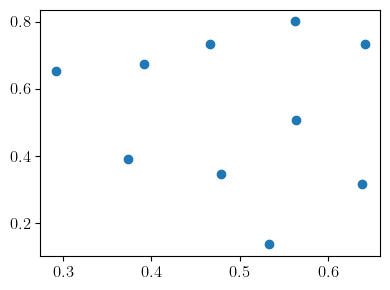

In [29]:
X = np.array( [ [Xc[player]["xc"],Xc[player]["yc"] ] for player in Xc.keys() ] )

plot = Plotter()

plot.ax.scatter( X[:,0], X[:,1] )

plot.ax.set_xlim(0,1)
plot.ax.set_ylim(0,1)

plot.show()